# Health Insurance Prediction

## importing the required libraries

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## importing the dataset

In [2]:
# importing the dataset

df = pd.read_csv('C:/Users/Shahrukh/python/data sets/health insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Checking the null values

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 There are no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


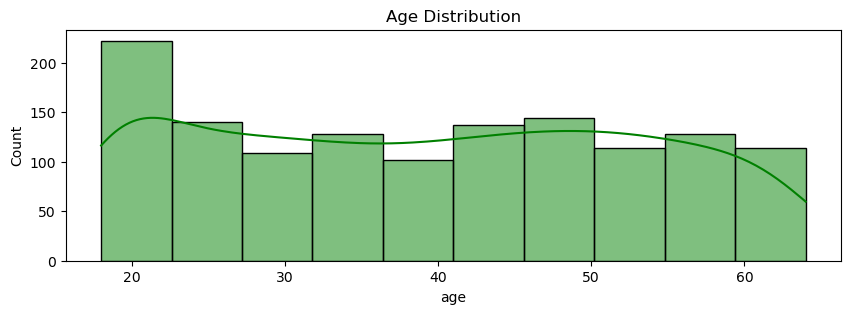

In [6]:
plt.figure(figsize=(10,3))
sns.histplot(x=df['age'],data=df,color='g',bins=10,kde=True)
plt.title('Age Distribution')
plt.show()

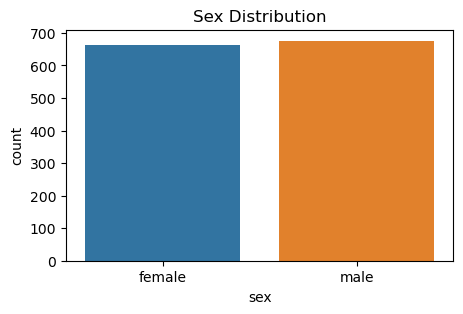

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['sex'])
plt.title('Sex Distribution')
plt.show()

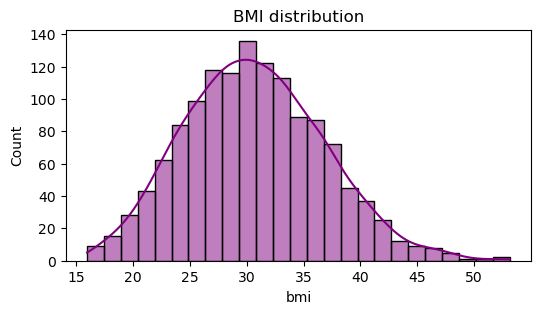

In [8]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['bmi'],color='purple',kde=True)
plt.title('BMI distribution')
plt.show()

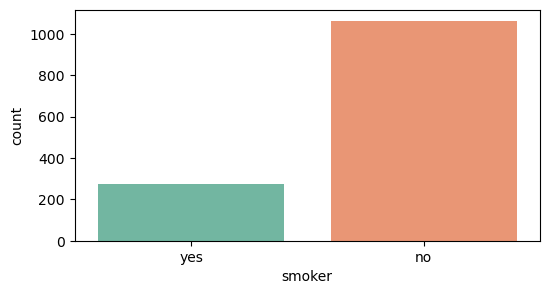

In [9]:
plt.figure(figsize=(6,3))
sns.countplot(x=df['smoker'],palette='Set2')
plt.show()

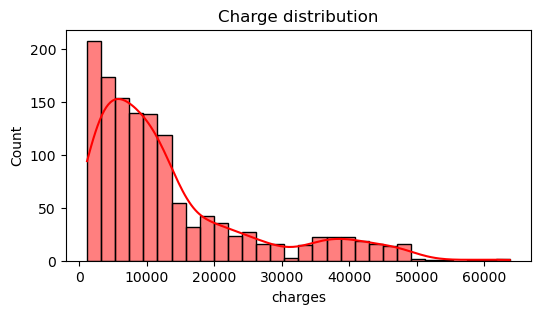

In [10]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['charges'],color='red',kde=True)
plt.title('Charge distribution')
plt.show()

## Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[['sex','smoker','region']]=df[['sex','smoker','region']].apply(le.fit_transform)

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='charges',axis=1)
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
regressor.score(x_test,y_test)

0.6957010622294884

In [17]:
regressor.score(x_train,y_train)

0.7633895728397835

## Building a Predictive Model

In [18]:
input_data = (32,1,28.880,0,0,1)

# convert tuple to numpy array
data_array = np.asarray(input_data)

# reshaping the array
reshaped_array = data_array.reshape(1,-1)


prediction = regressor.predict(reshaped_array)
prediction

array([5238.7826915])

## Checking R squared value

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6957010622294884

## Comparing the actual and predicted values

In [22]:
# reshaping y_test
y_test_matrix = y_test.values.reshape(-1,1)

# comparing actual and predicted values

data_frame = pd.DataFrame({'actual':y_test_matrix.flatten(),'predicted':y_pred.flatten()})
data_frame.head(10)

,actual,predicted
0,7281.50560,8039.033567
1,5267.81815,5851.810666
2,12347.17200,15121.877793
3,24513.09126,11469.475136
4,3736.46470,3738.841864
5,7358.17565,9586.042806
6,9788.86590,9507.614588
7,17085.26760,26051.466317
8,8211.10020,7763.056111
9,19798.05455,30735.586458


## Plotting the Graph

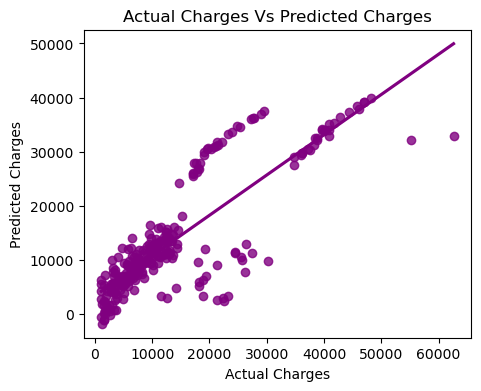

In [28]:
plt.figure(figsize=(5,4))
sns.regplot(x=y_test,y=y_pred,ci=None,color='purple')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges Vs Predicted Charges')
plt.show()

## Conclusion


In this project, we performed an in-depth Exploratory Data Analysis (EDA) on a health insurance dataset and built a linear regression model to predict the insurance charges.

We loaded and preprocessed the data, explored correlations and relationships using visualizations, selected relevant features based on EDA insights, built and trained a linear regression model, and evaluated its performance.

The linear regression model showed promise in predicting insurance charges based on the selected features.

However, there is still room for improvement.

Further steps could involve trying different regression algorithms, fine-tuning hyperparameters, and engineering new features for better performance.

EDA and feature selection played a crucial role in understanding the data and building an initial predictive model.

Thank You!!!

